# Regressão, Classificação Linear e Entropia


### Modelo Teórico e Erro Quadrático Médio (EQM)
Para ajustar um modelo teórico aos dados medidos, usamos a regressão linear. O **Erro Quadrático Médio (EQM)** é a métrica que indica a precisão do ajuste, calculando a média dos erros ao quadrado entre os valores observados e os valores previstos pelo modelo:

$$
\text{EQM} = \frac{1}{N} \sum_{n=1}^N (y_n - (ax_n + b))^2
$$

In [2]:
import numpy as np

def mbs(m, b, x, y, lr, n): 
  '''
  m = coef. ang.
  lr = learning rate
  n = num. de iteracoes
  '''
  for _ in range(n):
    mg = 0 # gradiente ang.
    bg = 0 # grandiente b
    for xi, yi in zip(x, y):
      xi, yi = float(xi), float(yi)
      mg += -(2/len(x)) * xi * (yi - (m * xi + b))
      bg += -(2/len(x)) * (yi - (m * xi + b))
    m = m - mg * lr
    b = b - bg * lr
  s = np.std(y - m * x + b)
  return m, b, s

In [3]:
def eqm(m, b, x, y):
  return np.mean((y - (m * x + b)) ** 2)


m = 4.00
b = 14.00
x = np.array([1.21, 2.19, 2.97, 7.44, 8.07, 8.95, 9.22, 9.61, 9.90, 9.95])
y = np.array([10.56, 19.15, 23.74, 41.31, 47.27, 48.97, 42.69, 54.67, 54.26, 53.75])

EQM = np.mean((y - (m * x + b)) ** 2)
EQM

16.63287000000001

In [4]:
medidas_x = np.linspace(10,100,50)
coef_angular_teorico = 1.7
desvio_padrao_da_medicao = 10 # Desvio padrão
medidas_y = coef_angular_teorico * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao


m, b, s = mbs(5, 0, medidas_x, medidas_y, 0.0001, 1000)
print(m, b, s)

1.6875626843880338 -0.22970868087478027 10.873172608506424


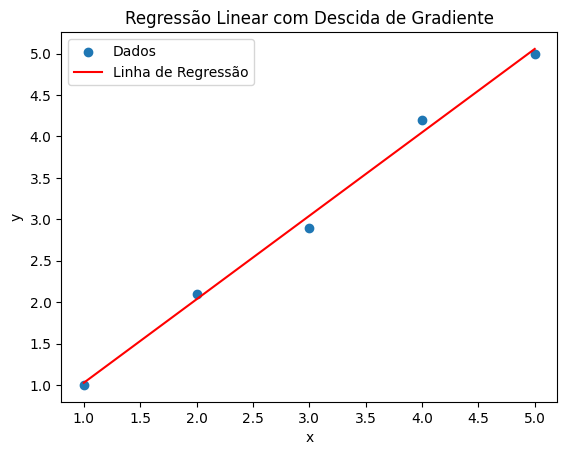

Coeficiente a: 1.0076530794060519, Intercepto b: 0.018473128018024552


In [10]:

import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2.1, 2.9, 4.2, 5])

a, b = 0, 0  # Coeficientes iniciais
alpha = 0.01  # Taxa de aprendizado
num_itera = 1000  # Número de iterações

def eqm(x, y, a, b):
    y_pred = a * x + b
    return np.mean((y - y_pred) ** 2)

# Descida de gradiente
for _ in range(num_itera):
    y_pred = a * x + b
    da = -2 * np.mean(x * (y - y_pred))
    db = -2 * np.mean(y - y_pred)
    a -= alpha * da
    b -= alpha * db

# Plot do ajuste
plt.scatter(x, y, label='Dados')
plt.plot(x, a * x + b, color='red', label='Linha de Regressão')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regressão Linear com Descida de Gradiente")
plt.show()
print(f"Coeficiente a: {a}, Intercepto b: {b}")


### Descida de Gradiente
Para encontrar os parâmetros ideais que minimizam o EQM, usamos a **descida de gradiente**, que ajusta iterativamente os parâmetros do modelo:

$$
a_{\text{novo}} = a_{\text{atual}} - \alpha \frac{dE}{da}
$$

onde \( \alpha \) é a taxa de aprendizado.

### Classificação Binária com Funções Lineares
A classificação linear divide o espaço de dados em duas regiões, separadas por uma linha (ou hiperplano). Um classificador linear simples para um ponto \((x, y)\) pode ser dado por:

$$
f(x, y) = Ax + By + C
$$

Se \( f(x, y) > 0 \), o ponto pertence a uma classe; se \( f(x, y) < 0 \), pertence a outra. Este modelo pode ser ajustado usando técnicas similares à regressão, incluindo o cálculo do EQM e o uso de descida de gradiente para ajustar os parâmetros \( A \), \( B \) e \( C \).

### Classificação com Múltiplas Dimensões
Para classificadores em múltiplas dimensões, generalizamos a função linear para vetores, onde o vetor de pesos \( \mathbf{w} \) e o termo de bias \( b \) são ajustados para otimizar a separação entre as classes:

$$
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b
$$


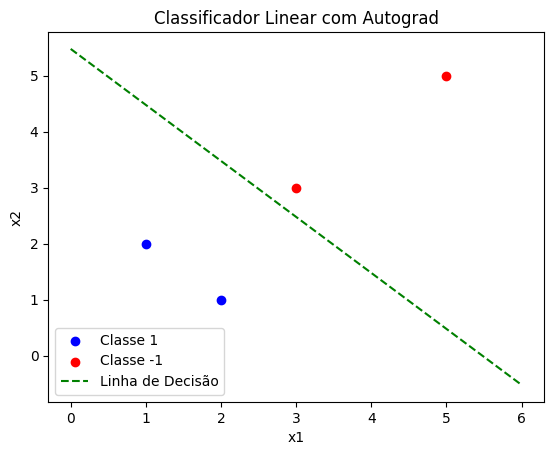

Parâmetros ajustados: A=-0.2984500635133323, B=-0.2984500635133323, C=1.634947750427961


In [12]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Dados de exemplo
x = np.array([[1, 2], [2, 1], [3, 3], [5, 5]])
y = np.array([1, 1, -1, -1])  # Classes

# Inicialização de parâmetros
A, B, C = 1.0, 1.0, 0.0  # Coeficientes iniciais

# Função do classificador
def classifier(x, A, B, C):
    return A * x[:, 0] + B * x[:, 1] + C

# Função de erro (EQM)
def loss(A, B, C):
    y_pred = classifier(x, A, B, C)
    return np.mean((y - y_pred) ** 2)

# Gradiente da função de perda
grad_loss = grad(loss, argnum=[0, 1, 2])

# Parâmetros de descida de gradiente
alpha = 0.01
epochs = 1000

# Descida de gradiente para ajustar A, B e C
for _ in range(epochs):
    dA, dB, dC = grad_loss(A, B, C)
    A -= alpha * dA
    B -= alpha * dB
    C -= alpha * dC

# Visualização dos dados e da linha de decisão
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='blue', label='Classe 1')
plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color='red', label='Classe -1')

x_vals = np.linspace(0, 6, 100)
y_vals = -(A * x_vals + C) / B
plt.plot(x_vals, y_vals, 'g--', label="Linha de Decisão")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Classificador Linear com Autograd")
plt.show()
print(f"Parâmetros ajustados: A={A}, B={B}, C={C}")


### Conceito de Entropia de Shannon
A **Entropia de Shannon** mede a quantidade de informação ou incerteza em uma variável aleatória. Para uma variável discreta \( X \), a entropia \( H(X) \) é definida como:

$$
H(X) = - \sum_i p(x_i) \log_2(p(x_i))
$$

onde \( p(x_i) \) é a probabilidade de cada valor \( x_i \) de \( X \).

### Exemplo de Entropia com Moedas e Dados
- Uma moeda honesta (50% cara, 50% coroa) tem entropia de 1 bit.
- Uma moeda enviesada (70% cara, 30% coroa) tem entropia menor, pois a incerteza é reduzida.

Essa medida de entropia também se aplica a jogos de adivinhação, onde perguntas com respostas "sim" ou "não" eliminam possíveis respostas de forma sequencial.

### Aplicação da Entropia em Jogos de Adivinhação
Para otimizar a estratégia de adivinhação, escolhemos perguntas que maximizam a entropia, reduzindo o número de possíveis respostas. A cada resposta, ajustamos as perguntas de forma a dividir as possibilidades restantes igualmente, minimizando o número de perguntas necessárias para identificar a resposta correta.

## Árvores de Decisão

As decisões em um jogo de adivinhação podem ser organizadas em uma **árvore de decisão**. A árvore organiza as perguntas e respostas como bifurcações que levam a resultados finais. Em aprendizado de máquina, árvores de decisão são utilizadas para fazer previsões baseadas em características observadas.
